### Formulas used to convert environmental variables to energy equivalents:

#### Solar energy calculation:

$$ E = A * r * H * PR * d * n $$

Where:
- E = Energy generated ($Watts$)
- A = area of solar panel ($m^{2}$)
- r = solar panel efficiency ($\%$)
- H = solar radiation ($W / m^{2}$)
- PR = performance ratio ($\%$)
- n = number of solar panels (#)

Normalization of observations to reflect daily averages:

Avg daily solar energy (kWh):

$$ Eavg = (SUM(E) / COUNT(E)) / 1000 * hos $$

Where:
- Eavg = Average daily solar energy (kWh)
- E = Calculated solar energy (W)
- hos = hours of sunlight (#)

#### Wind energy calculation:

$$ E = 0.5 * Cp * ρ * π * R^2 * V^3 $$

Where:
- E = Energy generated ($Watts$)
- Cp = Coeffiecient of performance ($\%$)
- ρ = air density ($kg / m^{3}$)
- R = blade length ($m$)
- V = wind speed ($m / s$)

Sources: 
- https://www.epa.gov/green-power-markets/green-power-equivalency-calculator-calculations-and-references
- https://www.forbes.com/home-improvement/solar/solar-panel-size-weight-guide/
- https://www.ryse.energy/5kw-wind-turbines/


### *Note: Primary analysis was carried out in Tableau.* 

*This notebook aims to accomplish similar analysis with access to more complex mathematical and statistical functions in the future.*

### Initializing

In [1]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import functions

In [2]:
# try to read solar_data_final into df
solar_data_final = pd.read_csv('../data/final_tables/solar_data_final.csv', 
    dtype={
    'network_id': 'string',
    'station_id': 'string',
    'time': 'string',
    'solar_radiation': 'float64',
    'latitude': 'float64',
    'longitude': 'float64',
    'elevation': 'float64'
    }, 
    parse_dates=['time'])

In [3]:
solar_data_final

,network_id,station_id,time,solar_radiation,latitude,longitude,elevation
0,FLNRO_FERN,1095439,2008-05-08 11:00:00,215.60,53.772461,-122.724517,602.0
1,FLNRO_FERN,1113683,2019-04-24 20:00:00,0.60,54.027527,-123.030078,743.0
2,FLNRO_FERN,1113683,2019-04-24 21:00:00,0.60,54.027527,-123.030078,743.0
3,FLNRO_FERN,1113683,2019-04-24 22:00:00,0.60,54.027527,-123.030078,743.0
4,FLNRO_FERN,1113683,2019-04-24 23:00:00,0.60,54.027527,-123.030078,743.0
...,...,...,...,...,...,...,...
2887122,UNBC_CAM,tatulake,2017-11-17 13:45:00,17.93,53.544700,-124.277000,938.0
2887123,UNBC_CAM,tatulake,2017-11-17 14:00:00,20.04,53.544700,-124.277000,938.0
2887124,UNBC_CAM,tatulake,2017-11-17 14:15:00,19.51,53.544700,-124.277000,938.0
2887125,UNBC_CAM,tatulake,2017-11-17 14:30:00,26.36,53.544700,-124.277000,938.0


In [4]:
# calculate solar energy from solar_radiation
solar_data_final['solar_energy_W'] = functions.calculate_solar_energy(solar_data_final)
solar_data_final


,network_id,station_id,time,solar_radiation,latitude,longitude,elevation,solar_energy_W
0,FLNRO_FERN,1095439,2008-05-08 11:00:00,215.60,53.772461,-122.724517,602.0,1026.619588
1,FLNRO_FERN,1113683,2019-04-24 20:00:00,0.60,54.027527,-123.030078,743.0,2.857012
2,FLNRO_FERN,1113683,2019-04-24 21:00:00,0.60,54.027527,-123.030078,743.0,2.857012
3,FLNRO_FERN,1113683,2019-04-24 22:00:00,0.60,54.027527,-123.030078,743.0,2.857012
4,FLNRO_FERN,1113683,2019-04-24 23:00:00,0.60,54.027527,-123.030078,743.0,2.857012
...,...,...,...,...,...,...,...,...
2887122,UNBC_CAM,tatulake,2017-11-17 13:45:00,17.93,53.544700,-124.277000,938.0,85.377037
2887123,UNBC_CAM,tatulake,2017-11-17 14:00:00,20.04,53.544700,-124.277000,938.0,95.424195
2887124,UNBC_CAM,tatulake,2017-11-17 14:15:00,19.51,53.544700,-124.277000,938.0,92.900502
2887125,UNBC_CAM,tatulake,2017-11-17 14:30:00,26.36,53.544700,-124.277000,938.0,125.518054


In [26]:
import numpy as np

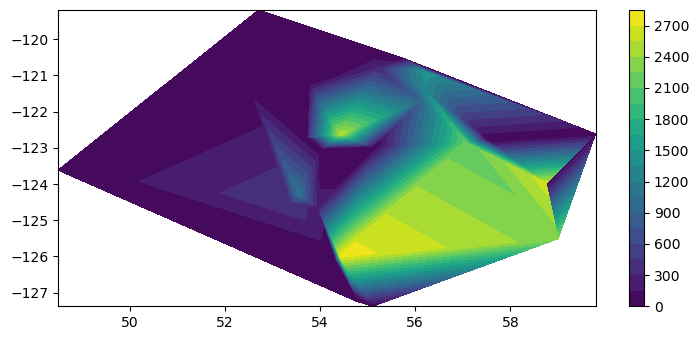

In [28]:

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

df = solar_data_final[['solar_energy_W','latitude','longitude']]

x = df['latitude']
y = df['longitude']
z = df['solar_energy_W']

plt.tricontourf(x, y, z, 20, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
# # calculate daily average solar energy for each station on each day
# dates = solar_data_final['time'].dt.date.unique()
# networks = solar_data_final['network_id'].unique()
# stations = solar_data_final['station_id'].unique()

# for network in networks:
#     for station in stations:
#         for date in dates:
#             solar_daily_avg = solar_data_final[].solar_energy_W.mean()
#             solar_data_final['daily_avg_energy_kWh'] = solar_daily_avg

# solar_data_final

In [16]:
solar_data_final['date'] = solar_data_final['time'].dt.date
solar_data_final

,network_id,station_id,time,solar_radiation,latitude,longitude,elevation,solar_energy_W,date
0,FLNRO_FERN,1095439,2008-05-08 11:00:00,215.60,53.772461,-122.724517,602.0,1026.619588,2008-05-08
1,FLNRO_FERN,1113683,2019-04-24 20:00:00,0.60,54.027527,-123.030078,743.0,2.857012,2019-04-24
2,FLNRO_FERN,1113683,2019-04-24 21:00:00,0.60,54.027527,-123.030078,743.0,2.857012,2019-04-24
3,FLNRO_FERN,1113683,2019-04-24 22:00:00,0.60,54.027527,-123.030078,743.0,2.857012,2019-04-24
4,FLNRO_FERN,1113683,2019-04-24 23:00:00,0.60,54.027527,-123.030078,743.0,2.857012,2019-04-24
...,...,...,...,...,...,...,...,...,...
2887122,UNBC_CAM,tatulake,2017-11-17 13:45:00,17.93,53.544700,-124.277000,938.0,85.377037,2017-11-17
2887123,UNBC_CAM,tatulake,2017-11-17 14:00:00,20.04,53.544700,-124.277000,938.0,95.424195,2017-11-17
2887124,UNBC_CAM,tatulake,2017-11-17 14:15:00,19.51,53.544700,-124.277000,938.0,92.900502,2017-11-17
2887125,UNBC_CAM,tatulake,2017-11-17 14:30:00,26.36,53.544700,-124.277000,938.0,125.518054,2017-11-17


In [22]:
station_daily_avg = (solar_data_final.groupby(['network_id','station_id','date'])['solar_energy_W']).mean()
station_daily_avg_kWh = station_daily_avg.divide(1000).multiply(functions.hours_of_sunlight(station_daily_avg, station_daily_avg['date']))
station_daily_avg_kWh.head(50)


KeyError: 'date'

In [14]:
solar_data_final.drop(columns=['daily_avg_energy_kWh'], inplace=True)
solar_data_final

,network_id,station_id,time,solar_radiation,latitude,longitude,elevation,solar_energy_W
0,FLNRO_FERN,1095439,2008-05-08 11:00:00,215.60,53.772461,-122.724517,602.0,1026.619588
1,FLNRO_FERN,1113683,2019-04-24 20:00:00,0.60,54.027527,-123.030078,743.0,2.857012
2,FLNRO_FERN,1113683,2019-04-24 21:00:00,0.60,54.027527,-123.030078,743.0,2.857012
3,FLNRO_FERN,1113683,2019-04-24 22:00:00,0.60,54.027527,-123.030078,743.0,2.857012
4,FLNRO_FERN,1113683,2019-04-24 23:00:00,0.60,54.027527,-123.030078,743.0,2.857012
...,...,...,...,...,...,...,...,...
2887122,UNBC_CAM,tatulake,2017-11-17 13:45:00,17.93,53.544700,-124.277000,938.0,85.377037
2887123,UNBC_CAM,tatulake,2017-11-17 14:00:00,20.04,53.544700,-124.277000,938.0,95.424195
2887124,UNBC_CAM,tatulake,2017-11-17 14:15:00,19.51,53.544700,-124.277000,938.0,92.900502
2887125,UNBC_CAM,tatulake,2017-11-17 14:30:00,26.36,53.544700,-124.277000,938.0,125.518054


In [9]:
solar_data_final['network_id'].unique()

<StringArray>
['FLNRO_FERN', 'UNBC_CAM', 'BCH', 'CRD']
Length: 4, dtype: string